# **What is Pneumonia?**
**Pneumonia is an inflammatory condition of the `lung affecting primarily the small air sacs known as alveoli`. Symptoms typically include some combination of productive or dry cough, chest pain, fever and difficulty breathing. The severity of the condition is variable. Pneumonia is usually caused by infection with viruses or bacteria and less commonly by other microorganisms, certain medications or conditions such as autoimmune diseases.Risk factors include cystic fibrosis, chronic obstructive pulmonary disease (COPD), asthma, diabetes, heart failure, a history of smoking, a poor ability to cough such as following a stroke and a weak immune system. Diagnosis is often based on symptoms and physical examination. Chest X-ray, blood tests, and culture of the sputum may help confirm the diagnosis.The disease may be classified by where it was acquired, such as community- or hospital-acquired or healthcare-associated pneumonia.**

# **Importing Dataset from Kaggle**

In [1]:
!pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

Defaulting to user installation because normal site-packages is not writeable


100%|█████████████████████████████████████████████████████████████████████████████| 2.29G/2.29G [04:48<00:00, 8.54MB/s]

Extracting files...


Path to dataset files: C:\Users\212670291.HCAD\.cache\kagglehub\datasets\paultimothymooney\chest-xray-pneumonia\versions\2


In [3]:
print("Path to dataset files:", path)

Path to dataset files: C:\Users\212670291.HCAD\.cache\kagglehub\datasets\paultimothymooney\chest-xray-pneumonia\versions\2


In [2]:
dataset_dir = "C:/Users/212670291.HCAD/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/chest_xray"

In [3]:
dataset_dir

'C:/Users/212670291.HCAD/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/chest_xray'

'C:/Users/212670291.HCAD/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/chest_xray'

# **1. Requirement Phase**

### **1.1. Configuration Libraries**

In [4]:
import warnings
warnings.filterwarnings("ignore")

### **1.2. Classical Libraries**

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **1.3. Machine Learning Libraries**

In [11]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---- ----------------------------------- 4.2/39.5 MB 22.9 MB/s eta 0:00:02
   -------- ------------------------------- 8.1/39.5 MB 21.0 MB/s eta 0:00:02
   ------------- -------------------------- 13.4/39.5 MB 22.7 MB/s eta 0:00:02
   ------------------ --------------------- 18.4/39.5 MB 23.2 MB/s eta 0:00:01
   ---------------------- ----------------- 22.5/39.5 MB 22.6 MB/s eta 0:00:01
   --------------------------- ------------ 27.0/39.5 MB 22.5 MB/s eta 0:00:01
   -------------------------------- ------- 31.7/39.5 MB 22.6 MB/s eta 0:00:01
   ------------------------------------ --- 35.9/39.5 MB 22.4 MB/s eta 0:00:01
   ---------------------------------------  39.3/39.5 MB 21.9 MB/s eta 0:00:01
   ---------------------------------------- 39.5/39.5 MB 20.8 MB/s eta 0:00:00


In [6]:
import os
import cv2 # Computer Vision (Images) / Manipulation
import keras
import tensorflow as tf
from sklearn.metrics import *
from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

# **Dataset Description**

* **There are three folders in the dataset**
  * **Train**
  * **Test**
  * **Validation**

In [7]:
# Define the Labels for our data
labels = ["PNEUMONIA", "NORMAL"]
# Defining the image
image_size = 150

### **Defining function for getting images**

In [8]:
def get_training_data(data_dir):
  data = []

  for x in labels:
    path = os.path.join(data_dir, x)
    class_num = labels.index(x)

    for img in os.listdir(path):
      try:
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        resized_arr = cv2.resize(img_arr, (image_size, image_size))
        data.append([resized_arr, class_num])
      except Exception as e:
        print(e)
  return np.array(data, dtype=object)

### **Loading the dataset**

In [9]:
# Training
train = get_training_data("C:/Users/212670291.HCAD/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/train")
# Testing
test = get_training_data("C:/Users/212670291.HCAD/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/test")
# Validation
validation = get_training_data("C:/Users/212670291.HCAD/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/val")

### **Data Visualization and Processing**

In [10]:
a = []

for x in train:
  if(x[1] == 0):
    a.append("PNEUMONIA")
  else:
    a.append("NORMAL")


In [11]:
a

['PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEU

['PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEU

<Axes: ylabel='count'>

<Axes: ylabel='count'>

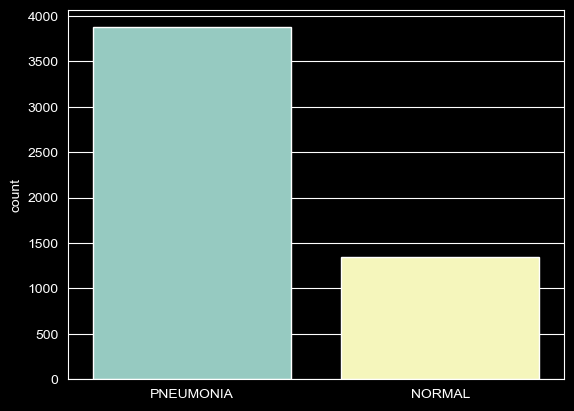

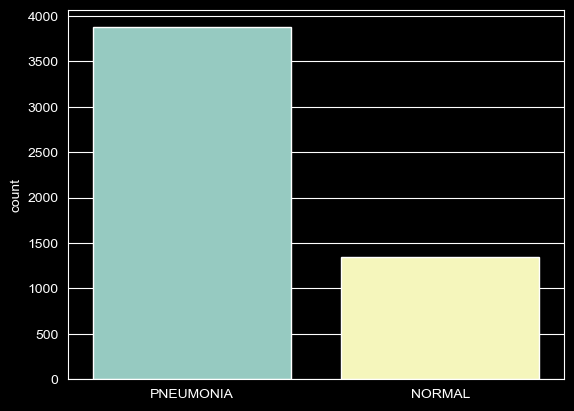

In [12]:
sns.set_style("darkgrid")
plt.style.use("dark_background")
sns.countplot(x=a)

**So, in this case the data is imbalanced. To increase the number of training examples, we will use `data augmentation`**

### **Preview the image**

Text(0.5, 1.0, 'NORMAL')

Text(0.5, 1.0, 'NORMAL')

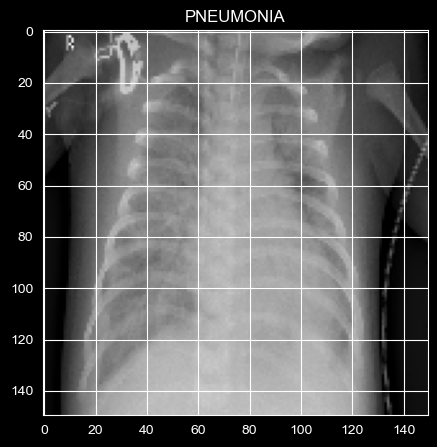

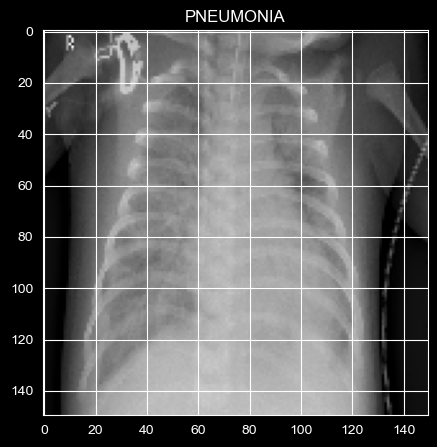

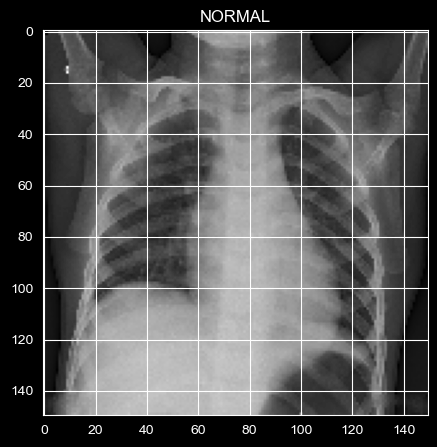

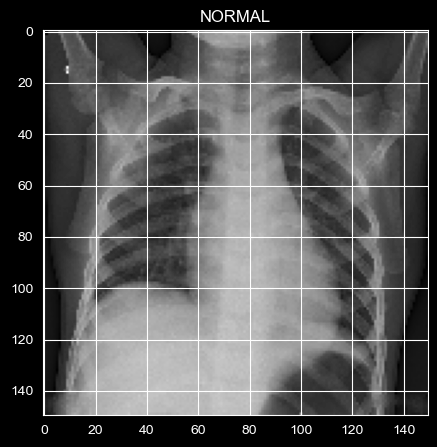

In [13]:
plt.figure(figsize = (5, 5))
plt.imshow(train[0][0], cmap = "gray")
plt.title(labels[train[0][1]])

plt.figure(figsize = (5, 5))
plt.imshow(train[-1][0], cmap = "gray")
plt.title(labels[train[-1][1]])

### **Training and Testing Dataset**

In [14]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

In [15]:
for feat, label in train:
  x_train.append(feat)
  y_train.append(label)

for feat, label in validation:
  x_val.append(feat)
  y_val.append(label)

for feat, label in test:
  x_test.append(feat)
  y_test.append(label)

### **Normalization**

In [16]:
x_train = np.array(x_train) / 255

x_val = np.array(x_val) / 255

x_test = np.array(x_test) / 255

#### **Reshape for better convergence**

In [17]:
x_train = x_train.reshape(-1, image_size, image_size, 1)
y_train = np.array(y_train)

x_test = x_test.reshape(-1, image_size, image_size, 1)
y_test = np.array(y_test)

x_val = x_val.reshape(-1, image_size, image_size, 1)
y_val = np.array(y_val)

* **Reshaping: Change the data's shape (dimension), structure changes (NO pixel value changes)**


* **Resizing: Adjusting the size of the image (height and width), pixel value are getting modified**

##  Data Augmentation

**For Data Generation**
  * **Randomly rotate some training images to 30 degree**
  * **Randomly Zoom by 20%**
  * **Shift Horizontally by 10%**
  * **Shift Vertically by 10%**

In [18]:
datagen = ImageDataGenerator(
    rotation_range = 30,
    zoom_range = 0.2,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = False)

In [19]:
datagen.fit(x_train)

In [30]:
del model

## Compile Model

In [31]:
model = Sequential()

model.add(Conv2D(32, (3, 3), strides = 1, padding = "same", activation = "relu", input_shape = (150, 150, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides = 2, padding = "same"))

model.add(Conv2D(64, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides = 2, padding = "same"))

model.add(Conv2D(64, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides = 2, padding = "same"))

model.add(Conv2D(128, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides = 2, padding = "same"))

model.add(Conv2D(256, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides = 2, padding = "same"))

model.add(Flatten())
model.add(Dense(units = 128, activation = "relu"))

model.add(Dropout(0.2))
model.compile(optimizer = 'adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics= ['accuracy'])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 150, 150, 32)      320       
                                                                 
 batch_normalization_10 (Ba  (None, 150, 150, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 75, 75, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 dropout_8 (Dropout)         (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_11 (Ba  (None, 75, 75, 64)       

In [21]:
learning_rate_reduction = ReduceLROnPlateau(monitor = "val_accuracy", patience = 2, verbose = 1, factor = 0.3, min_lr = 0.000001)

In [22]:
learning_rate_reduction

### **Fit the model**

In [29]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size = 32),
    epochs = 3,
    validation_data = datagen.flow(x_val, y_val))

Epoch 1/3
Epoch 1/3


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\asyncio\events.py", line 80, in _run

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code

  File "C:\Users\212670291.HCAD\AppData\Local\Temp\ipykernel_10932\4234230744.py", line 1, in <module>

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1807, in fit

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1401, in train_function

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1384, in step_function

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1373, in run_step

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1151, in train_step

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1209, in compute_loss

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 143, in __call__

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 270, in call

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 2454, in sparse_categorical_crossentropy

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\backend.py", line 5775, in sparse_categorical_crossentropy

Received a label value of 1 which is outside the valid range of [0, 1).  Label values: 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_6359]

InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\asyncio\events.py", line 80, in _run

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code

  File "C:\Users\212670291.HCAD\AppData\Local\Temp\ipykernel_10932\4234230744.py", line 1, in <module>

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1807, in fit

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1401, in train_function

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1384, in step_function

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1373, in run_step

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1151, in train_step

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1209, in compute_loss

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 143, in __call__

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 270, in call

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 2454, in sparse_categorical_crossentropy

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\backend.py", line 5775, in sparse_categorical_crossentropy

Received a label value of 1 which is outside the valid range of [0, 1).  Label values: 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_6359]

In [34]:
print(f"Loss of Model: {model.evaluate(x_test, y_test)[0]}")

12/20 [=================>............] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\asyncio\events.py", line 80, in _run

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes

  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code

  File "C:\Users\212670291.HCAD\AppData\Local\Temp\ipykernel_28260\996329239.py", line 1, in <module>

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2296, in evaluate

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 4108, in run_step

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2066, in test_function

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2049, in step_function

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2037, in run_step

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1919, in test_step

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1209, in compute_loss

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 143, in __call__

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 270, in call

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 2454, in sparse_categorical_crossentropy

  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\keras\src\backend.py", line 5775, in sparse_categorical_crossentropy

Received a label value of 1 which is outside the valid range of [0, 1).  Label values: 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_test_function_9271]

In [32]:
print(f"Accuracy of Model: {model.evaluate(x_test, y_test)[1]*100}%")

20/20 [==============================] - 3s 123ms/step - loss: 1.6097 - accuracy: 0.6506
Accuracy of Model: 65.06410241127014%


## **Analysis of the Model (Post Modelling Procedure)**

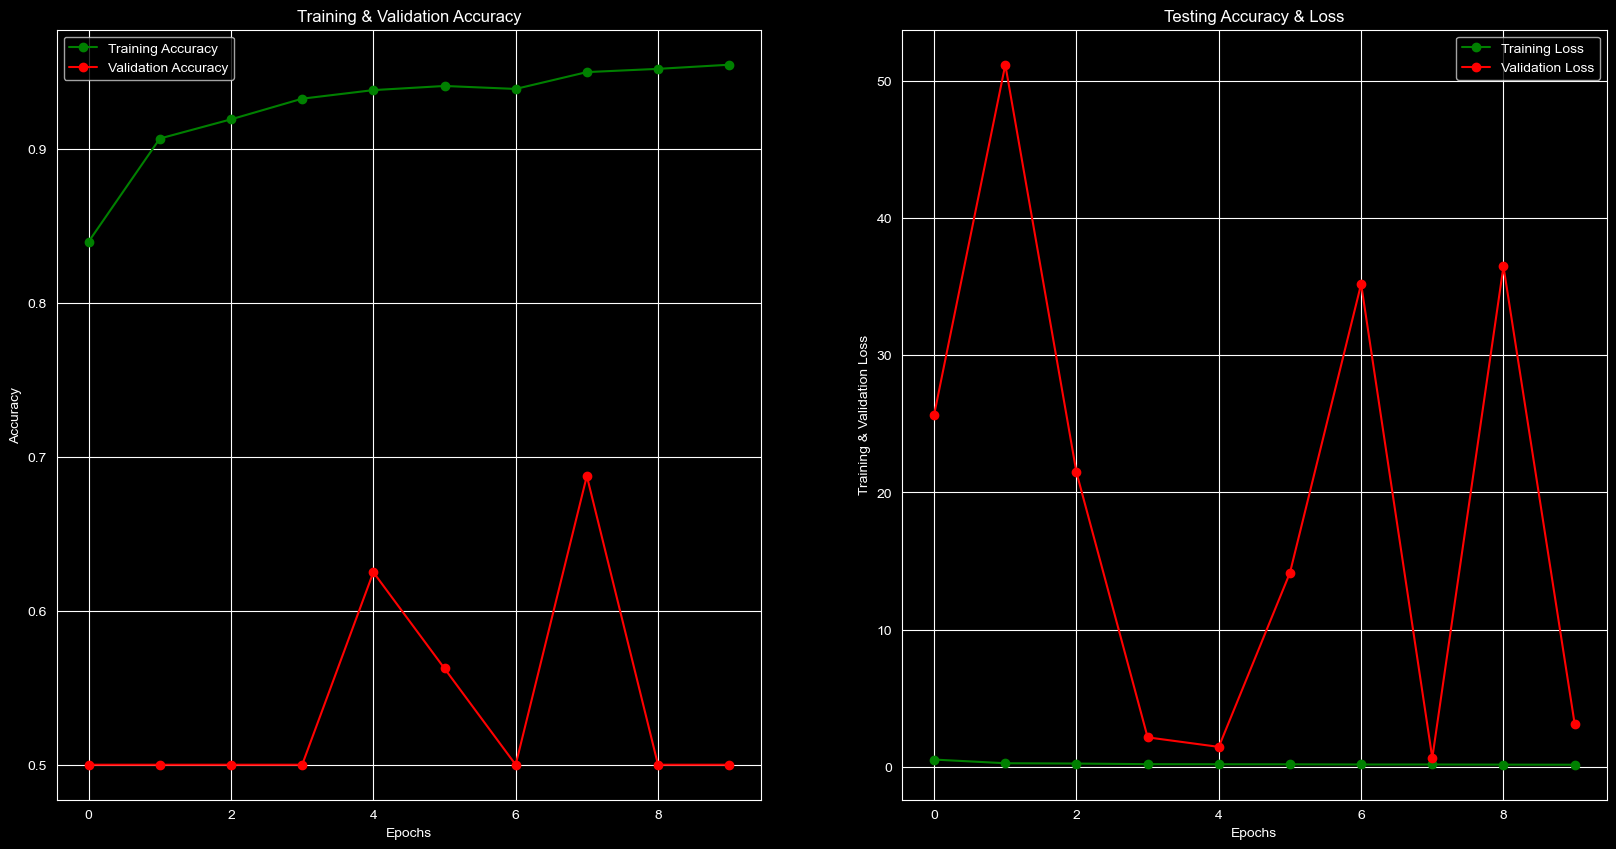

In [34]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

## **Prediction**

In [35]:
predictions = model.predict(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

20/20 [==============================] - 3s 119ms/step


array([0.14775309, 0.43260825, 0.70387405, 0.06333681, 0.0288187 ,
       0.06904437, 0.04968844, 0.9998209 , 0.9966592 , 0.28771064,
       0.83499587, 0.9984024 , 0.03203222, 0.0194991 , 0.12375608],
      dtype=float32)

In [36]:
predictions = (predictions > 0.5).astype(int)
predictions[:15]

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0])

In [37]:
print(classification_report(y_test, predictions, target_names = labels))

              precision    recall  f1-score   support

   PNEUMONIA       0.92      0.48      0.63       390
      NORMAL       0.52      0.93      0.67       234

    accuracy                           0.65       624
   macro avg       0.72      0.71      0.65       624
weighted avg       0.77      0.65      0.65       624



In [38]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

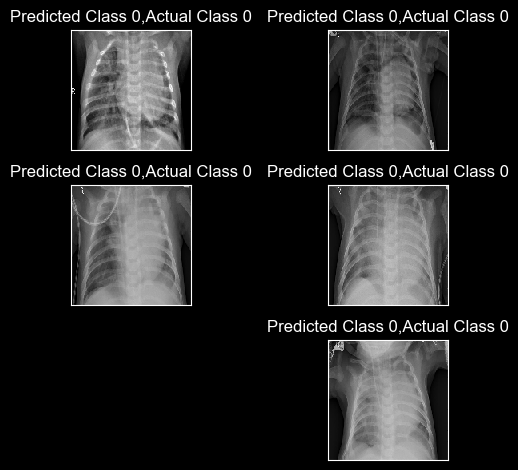

In [39]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

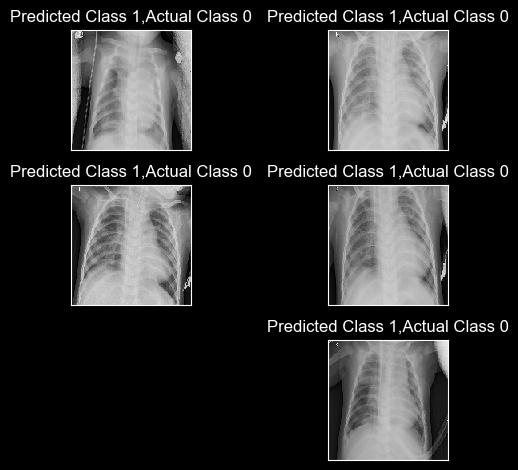

In [40]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1